# Assignment Chapter 2 - MACHINE LEARNING [Case #2]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Dataset: cluster_s1
* Libraries: Pandas, Numpy, Scikit-learn, Matplotlib, Seaborn
* Objective: Data Segmentation with KMeans Clustering

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu membandingkan akurasi klasifikasi dari berbagai model *supervised learning*.

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score

### Read Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data = data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


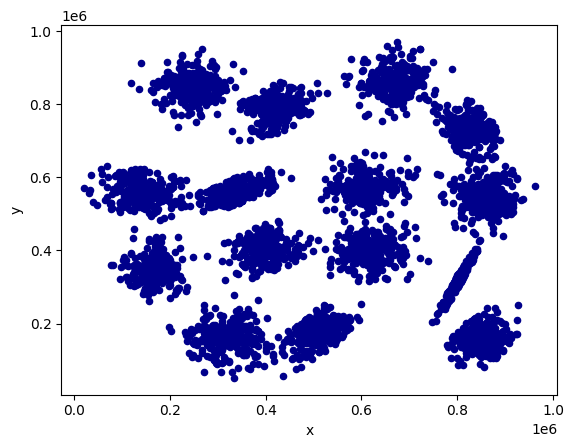

In [ ]:
%matplotlib inline
ax1 = data.plot.scatter(x='x', y='y', c='DarkBlue')

### Data Segmentation (Clustering)

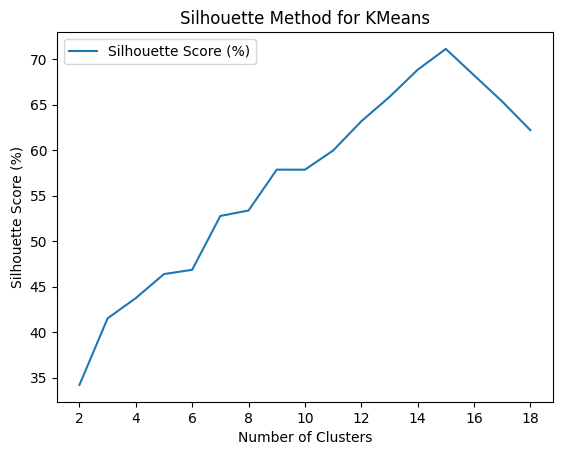

In [ ]:
# TODO: Lakukan pencarian jumlah cluster terbaik berdasarkan data diatas
from sklearn.cluster import KMeans

# Inisialisasi list untuk menyimpan nilai silhouette average
silhouette_avg = []

# Looping untuk menentukan jumlah cluster terbaik dari 2 hingga 18
for k in range(2, 19):
    model = KMeans(n_clusters=k, random_state=10)
    cluster_labels = model.fit_predict(data)
    silhouette_avg.append(silhouette_score(data, cluster_labels))

# Simpan hasil ke dalam DataFrame
silhouette = pd.DataFrame({"Silhouette Score (%)": [score * 100 for score in silhouette_avg]}, index=[i for i in range(2, 19)])

# Plot Silhouette Score
silhouette.plot(kind="line")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score (%)")
plt.title("Silhouette Method for KMeans")
plt.show()

In [ ]:
# TODO: Lakukan pemodelan dengan KMeans
kmeans = cluster.KMeans(n_clusters=15, random_state=42)
kmeans.fit(data)
label = kmeans.predict(data)

best_k = silhouette["Silhouette Score (%)"].idxmax()
best_score = silhouette["Silhouette Score (%)"].max()
print("Best number of clusters: {}".format(best_k))
print("Best Silhouette Score: {:.2f}%".format(best_score))

Best number of clusters: 15
Best Silhouette Score: 71.13%


### Visualization: Cluster Result

In [ ]:
# TODO: Masukkan label hasil clustering ke dalam DataFrame

result = data.copy()
result['cluster'] = label
result.head()

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


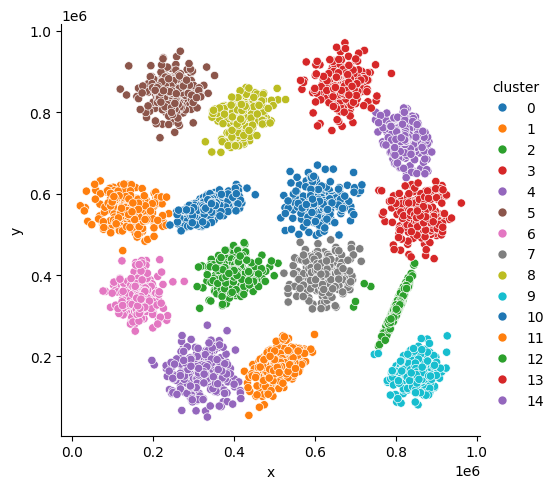

In [ ]:
# TODO: Plot data hasil clustering dengan Seaborn
sns.relplot(x="x", y="y", hue="cluster", data=result, palette="tab10")

### Scoring
Total `#TODO` = 4
<br>Checklist:

- [✔️] Lakukan pencarian jumlah cluster terbaik berdasarkan data diatas
- [✔️] Lakukan pemodelan dengan KMeans
- [✔️] Masukkan label hasil clustering ke dalam DataFrame
- [✔️] Plot data hasil clustering dengan Seaborn

### Additional readings
- N/A

### Copyright © 2024 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.